## Plotting multiple graphs

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file = 'csv_files/pittsburgh2013.csv'

df = pd.read_csv(file, usecols=['Mean TemperatureF', 'Date', 'Mean Dew PointF'], 
                 parse_dates=True)

df.Date = pd.to_datetime(df.Date)

df.dtypes

Date                 datetime64[ns]
Mean TemperatureF             int64
Mean Dew PointF               int64
dtype: object

In [1]:
df.Date.head()

0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
4   2013-01-05
Name: Date, dtype: datetime64[ns]

In [3]:
np_date = np.array(df[df.columns[0]], dtype='datetime64[D]')  # '[D] option allows to change default 
                                                              #  nanosecond precision to day precision
np_temp = np.array(df[df.columns[1]])
np_dew = np.array(df[df.columns[2]])

np_date[:5], np_temp[:5], np_dew[:5]

(array(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
        '2013-01-05'], dtype='datetime64[D]'),
 array([28, 21, 24, 28, 30]),
 array([27, 12, 15, 19, 20]))

### Graphs on common axes

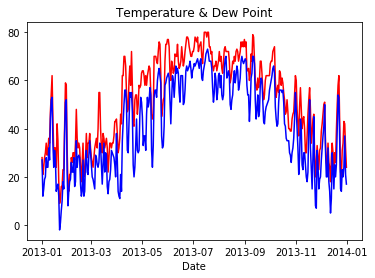

In [4]:
plt.plot(np_date, np_temp, 'r')
plt.plot(np_date, np_dew, 'b')  # appears on same axes

plt.xlabel('Date')
plt.title('Temperature & Dew Point')

plt.show()  # renders plot objects to screen

### Using axes()

Syntax: axes([x_lo, y_lo, width, height]) in figure units [0; 1]

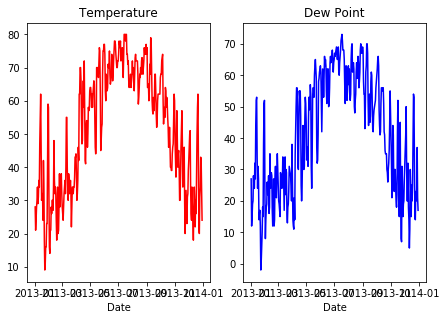

In [5]:
plt.axes([0.05, 0.05, 0.425, 0.9])
plt.plot(np_date, np_temp, 'r')
plt.xlabel('Date')
plt.title('Temperature')

plt.axes([0.55, 0.05, 0.425, 0.9])
plt.plot(np_date, np_dew, 'b')
plt.xlabel('Date')
plt.title('Dew Point')

plt.show()

### Using subplot()

Syntax: subplot(nrows, ncols, nsubplot). Row wise from top left, indexed from 1

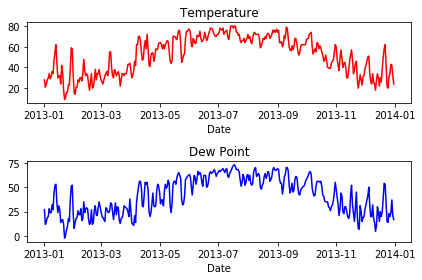

In [6]:
plt.subplot(2, 1, 1)
plt.plot(np_date, np_temp, 'r')
plt.xlabel('Date')
plt.title('Temperature')

plt.subplot(2, 1, 2)
plt.plot(np_date, np_dew, 'b')
plt.xlabel('Date')
plt.title('Dew Point')

plt.tight_layout()
plt.show()

## Customizing axes

### Controlling axes extents

syntax: axis([xmin, xmax, ymin, ymax])

syntax: xlim([xmin, xmax])

syntax: ylim([ymin, ymax])

In [2]:
file = 'csv_files/gdp_est.csv'

gdp_est = pd.read_csv(file, sep='\t', header=None, names=['country', 'abbreviation', 'year', 'gdp'])

gdp_est.head()

country abbreviation  year           gdp
0  Estonia          EST   1995  4.373665e+09
1  Estonia          EST   1996  4.746110e+09
2  Estonia          EST   1997  5.066240e+09
3  Estonia          EST   1998  5.617109e+09
4  Estonia          EST   1999  5.726898e+09

In [8]:
year = np.array(gdp_est.year)
gdp = np.array(gdp_est.gdp)

year[:5], ' --- ', gdp[:5]

(array([1995, 1996, 1997, 1998, 1999]),
 ' --- ',
 array([4.37366515e+09, 4.74610977e+09, 5.06624042e+09, 5.61710924e+09,
        5.72689800e+09]))

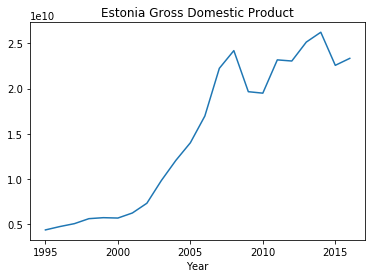

In [9]:
plt.plot(year, gdp)
plt.xlabel('Year')
plt.title('Estonia Gross Domestic Product')
plt.show()

In [3]:
file = 'csv_files/gdp_usa.csv'

gdp_usa = pd.read_csv(file, sep='\t', header=None, names=['country', 'abbreviation', 'year', 'gdp'])

gdp_us = np.array(gdp_usa.gdp)
year_us = np.array(gdp_usa.year)

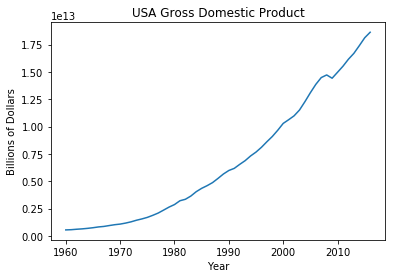

In [11]:
plt.plot(year_us, gdp_us)
plt.xlabel('Year')
plt.ylabel('Billions of Dollars')
plt.title('USA Gross Domestic Product')
plt.show()

Using xlim()

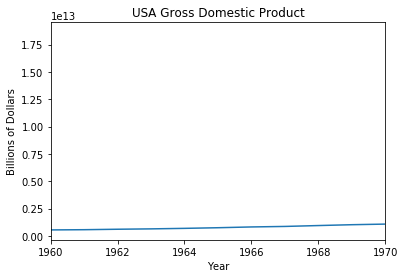

In [12]:
plt.plot(year_us, gdp_us)
plt.xlabel('Year')
plt.ylabel('Billions of Dollars')
plt.title('USA Gross Domestic Product')
plt.xlim([1960, 1970])
plt.show()

In [13]:
plt.plot(year_us, gdp_us)
plt.xlabel('Year')
plt.ylabel('Dollars')
plt.title('USA Gross Domestic Product')

plt.xlim([1960, 1970])
plt.ylim([0, 0.25e13])
plt.show()

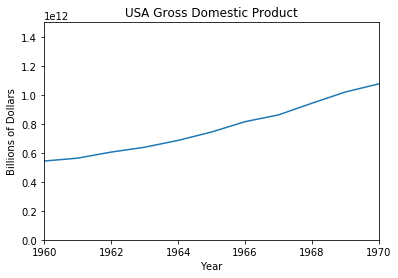

In [14]:
plt.plot(year_us, gdp_us)
plt.xlabel('Year')
plt.ylabel('Billions of Dollars')
plt.title('USA Gross Domestic Product')
plt.axis([1960, 1970, 0, 0.15e13])

plt.show()

### Legends, annotations & styles

In [3]:
path = 'csv_files/'

flowers = pd.read_csv(path + 'iris.csv', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 
                                                             'petal_width', 'species'])

flowers.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [4]:
flowers.species = flowers.species.map(lambda x: x[5:])  # remove the Iris part
flowers.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [17]:
flowers.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
setosa_len = np.array(flowers[flowers.species == 'setosa']['sepal_length'])
setosa_wid = np.array(flowers[flowers.species == 'setosa']['sepal_width'])

versicolor_len = np.array(flowers[flowers.species == 'versicolor']['sepal_length'])
versicolor_wid = np.array(flowers[flowers.species == 'versicolor']['sepal_width'])

virginica_len = np.array(flowers[flowers.species == 'virginica']['sepal_length'])
virginica_wid = np.array(flowers[flowers.species == 'virginica']['sepal_width'])

### Using legend()

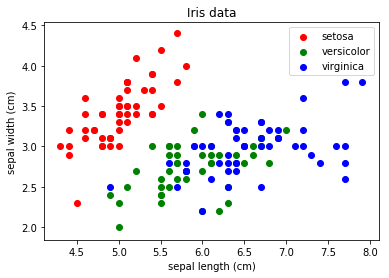

In [19]:
plt.scatter(setosa_len, setosa_wid,
            marker='o', color='red', label='setosa')

plt.scatter(versicolor_len, versicolor_wid,
            marker='o', color='green', label='versicolor')

plt.scatter(virginica_len, virginica_wid,
            marker='o', color='blue', label='virginica')

plt.legend(loc='best')  # has 10 different locations e.g. : 
                        #'upper left', 'lower center', 'lower right'

plt.title('Iris data')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.show()

### Plot annotations

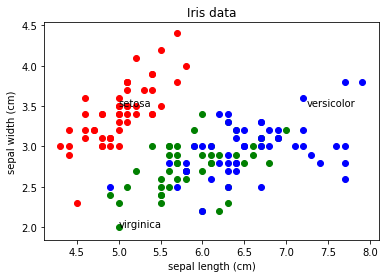

In [20]:
plt.scatter(setosa_len, setosa_wid,
            marker='o', color='red', label='setosa')

plt.scatter(versicolor_len, versicolor_wid,
            marker='o', color='green', label='versicolor')

plt.scatter(virginica_len, virginica_wid,
            marker='o', color='blue', label='virginica')

plt.title('Iris data')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.annotate('setosa', xy=(5.0, 3.5))
plt.annotate('versicolor', xy=(7.25, 3.5))
plt.annotate('virginica', xy=(5.0, 2.0))

plt.show()

Using anootate() for arrows

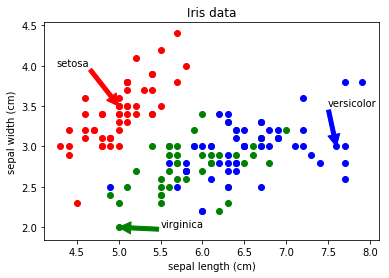

In [21]:
plt.scatter(setosa_len, setosa_wid,
            marker='o', color='red', label='setosa')

plt.scatter(versicolor_len, versicolor_wid,
            marker='o', color='green', label='versicolor')

plt.scatter(virginica_len, virginica_wid,
            marker='o', color='blue', label='virginica')

plt.title('Iris data')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.annotate('setosa', xy=(5.0, 3.5),
             xytext=(4.25, 4.0), arrowprops={'color': 'red'})

plt.annotate('versicolor', xy=(7.6, 3.0),
             xytext=(7.5, 3.5), arrowprops={'color': 'blue'})

plt.annotate('virginica', xy=(5.0, 2.0),
             xytext=(5.5, 2.0), arrowprops={'color': 'green'})

plt.show()

### Plot styles

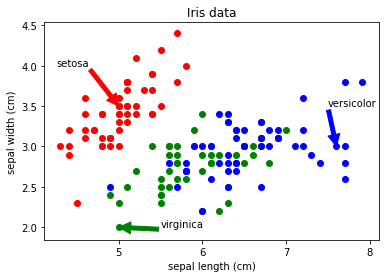

In [22]:
plt.scatter(setosa_len, setosa_wid,
            marker='o', color='red', label='setosa')

plt.scatter(versicolor_len, versicolor_wid,
            marker='o', color='green', label='versicolor')

plt.scatter(virginica_len, virginica_wid,
            marker='o', color='blue', label='virginica')

plt.title('Iris data')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.annotate('setosa', xy=(5.0, 3.5),
             xytext=(4.25, 4.0), arrowprops={'color': 'red'})

plt.annotate('versicolor', xy=(7.6, 3.0),
             xytext=(7.5, 3.5), arrowprops={'color': 'blue'})

plt.annotate('virginica', xy=(5.0, 2.0),
             xytext=(5.5, 2.0), arrowprops={'color': 'green'})

plt.style.use('fivethirtyeight')

plt.show()

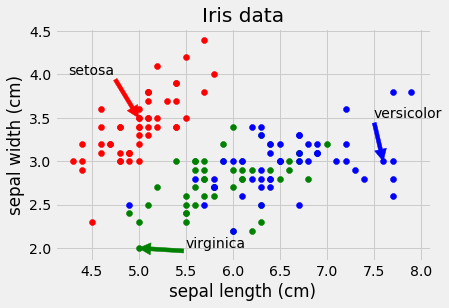

In [23]:
plt.scatter(setosa_len, setosa_wid,
            marker='o', color='red', label='setosa')

plt.scatter(versicolor_len, versicolor_wid,
            marker='o', color='green', label='versicolor')

plt.scatter(virginica_len, virginica_wid,
            marker='o', color='blue', label='virginica')

plt.title('Iris data')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.annotate('setosa', xy=(5.0, 3.5),
             xytext=(4.25, 4.0), arrowprops={'color': 'red'})

plt.annotate('versicolor', xy=(7.6, 3.0),
             xytext=(7.5, 3.5), arrowprops={'color': 'blue'})

plt.annotate('virginica', xy=(5.0, 2.0),
             xytext=(5.5, 2.0), arrowprops={'color': 'green'})

plt.style.use('ggplot')

plt.show()

In [1]:
import matplotlib.pyplot as plt
print(plt.style.available) # to see all the available style sheets

['_classic_test', 'seaborn-pastel', 'dark_background', 'seaborn-bright', 'seaborn-white', 'seaborn-deep', 'seaborn-dark-palette', 'grayscale', 'seaborn-talk', 'seaborn-whitegrid', 'classic', 'fast', 'ggplot', 'seaborn-muted', 'bmh', 'seaborn', 'fivethirtyeight', 'seaborn-poster', 'seaborn-notebook', 'seaborn-ticks', 'seaborn-darkgrid', 'seaborn-colorblind', 'seaborn-dark', 'tableau-colorblind10', 'seaborn-paper', 'Solarize_Light2']


In [25]:
temp = np.array([10, 20, 30, 20, 25, 10])
year = np.array([1991, 1992, 1993, 1994, 1995, 1996])

max_temp = temp.max()
year_max_temp = year[temp.argmax()]

max_temp, ' --- ', year_max_temp 

(30, ' --- ', 1993)

## Working with 2D arrays

### using meshgrid()

In [26]:
u = np.linspace(-1, 1, 5) # 1D array of uniformly spaced values

v = np.linspace(-1, 1, 5)

X, Y = np.meshgrid(u, v) # meshgrid() replicates 1D arrays on different axis to
                         # make 2D arrays X and Y

X, '-----------------------', Y

(array([[-1. , -0.5,  0. ,  0.5,  1. ],
        [-1. , -0.5,  0. ,  0.5,  1. ],
        [-1. , -0.5,  0. ,  0.5,  1. ],
        [-1. , -0.5,  0. ,  0.5,  1. ],
        [-1. , -0.5,  0. ,  0.5,  1. ]]),
 '-----------------------',
 array([[-1. , -1. , -1. , -1. , -1. ],
        [-0.5, -0.5, -0.5, -0.5, -0.5],
        [ 0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0.5,  0.5,  0.5,  0.5,  0.5],
        [ 1. ,  1. ,  1. ,  1. ,  1. ]]))

In [27]:
Z = X**2/25 + Y**2/4

print('Z:\n', Z)

Z:
 [[0.29   0.26   0.25   0.26   0.29  ]
 [0.1025 0.0725 0.0625 0.0725 0.1025]
 [0.04   0.01   0.     0.01   0.04  ]
 [0.1025 0.0725 0.0625 0.0725 0.1025]
 [0.29   0.26   0.25   0.26   0.29  ]]


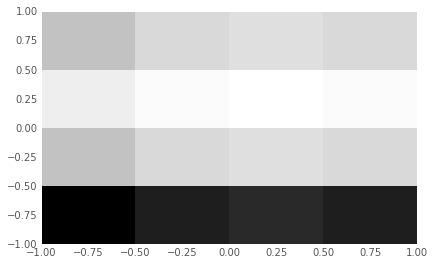

In [28]:
plt.set_cmap('Greys')
plt.pcolor(X, Y, Z) # pcolor means psudocolors
plt.show()

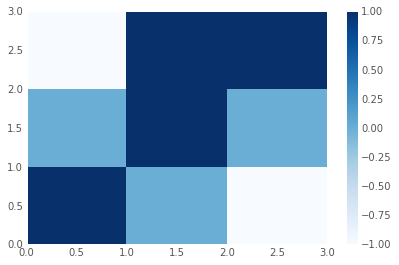

In [29]:
# lets have a array:
A = np.array([[1, 0, -1], [0, 1, 0], [-1, 1, 1]])

# construct a plot from the array
plt.pcolor(A, cmap='Blues')
plt.colorbar()
plt.show()

# notice the values run from the origin of the axis to the left and then up

### Visualizing bivariate functions

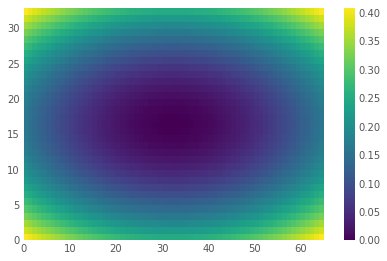

In [30]:
u = np.linspace(-2, 2, 65)
v = np.linspace(-1, 1, 33)

X, Y = np.meshgrid(u, v)

Z = X**2/25 + Y**2/4

plt.pcolor(Z, cmap='viridis')
plt.colorbar()

# optional parameter if the figure does not fit into grid
plt.axis('tight')

plt.show()

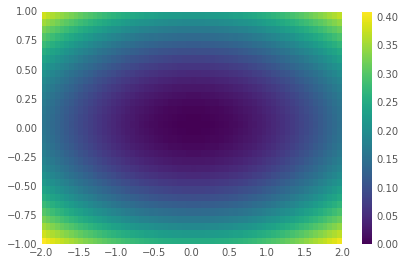

In [31]:
# to get rid of the axis values and rather get the coordinates we insert X, Y, and Z to pcolor()
u = np.linspace(-2, 2, 65)
v = np.linspace(-1, 1, 33)

X, Y = np.meshgrid(u, v)

Z = X**2/25 + Y**2/4

plt.pcolor(X, Y, Z, cmap='viridis')
plt.colorbar()

# optional parameter if the figure does not fit into grid
plt.axis('tight')

plt.show()

### Contour plots

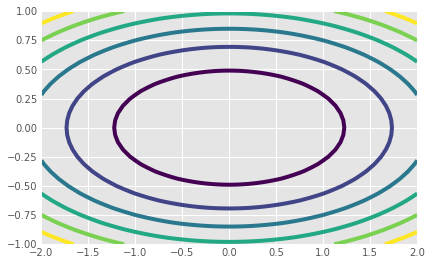

In [32]:
u = np.linspace(-2, 2, 65)
v = np.linspace(-1, 1, 33)

X, Y = np.meshgrid(u, v)

Z = X**2/25 + Y**2/4

plt.contour(X, Y, Z, cmap='viridis')

# optional parameter if the figure does not fit into grid

plt.show()

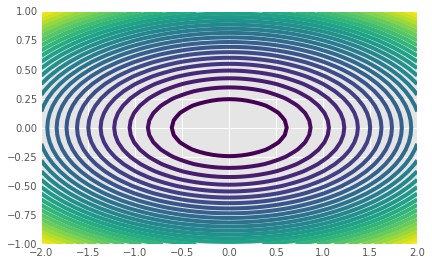

In [33]:
# we can specify the number of contours to draw, e.g. 30:
u = np.linspace(-2, 2, 65)
v = np.linspace(-1, 1, 33)

X, Y = np.meshgrid(u, v)

Z = X**2/25 + Y**2/4

plt.contour(X, Y, Z, 30, cmap='viridis')

# optional parameter if the figure does not fit into grid

plt.show()

### Filled contour plots .contourf()

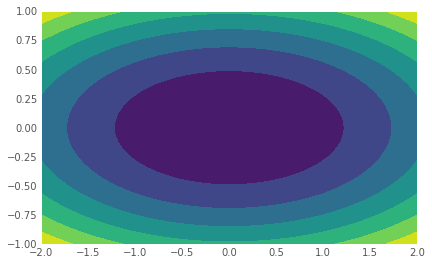

In [34]:
u = np.linspace(-2, 2, 65)
v = np.linspace(-1, 1, 33)

X, Y = np.meshgrid(u, v)

Z = X**2/25 + Y**2/4

plt.contourf(X, Y, Z, cmap='viridis')

# optional parameter if the figure does not fit into grid

plt.show()

## Visualizing bivariate distributions

### Distributions with 2D points

The goal is to generate 2D histograms with two 1D arrays (x and y)

In [38]:
df = pd.read_csv(path + 'auto-mpg.csv')

df.head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>mpg</th>
      <th>cylinders</th>
      <th>displacement</th>
      <th>horsepower</th>
      <th>weight</th>
      <th>acceleration</th>
      <th>model-year</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>18.0</td>
      <td>8</td>
      <td>307.0</td>
      <td>130.0</td>
      <td>3504</td>
      <td>12.0</td>
      <td>70</td>
    </tr>
    <tr>
      <th>1</th>
      <td>15.0</td>
      <td>8</td>
      <td>350.0</td>
      <td>165.0</td>
      <td>3693</td>
      <td>11.5</td>
      <td>70</td>
    </tr>
    <tr>
      <th>2</th>
      <td>18.0</td>
      <td>8</td>
      <td>318.0</td>
      <td>150.0</td>
      <td>3436</td>
      <td>11.0</td>
      <td>70</td>
    </tr>
    <tr>
      <th>3</th>
      <td>16.0</td>
      <td>8</td>
      <td>304.0</td>
      <td>150.0</td>
      <td>3433</td>
      <td>12.0</td>
      <td>70</td>
    </tr>
    <tr>
      <th>4</th>
      <td>17.0</td>
      <td>8</td>
      <td>302.0</td>
      <td>140.0</td>
      <td>3449</td>
      <td>10.5</td>
      <td>70</td>
    </tr>
  </tbody>
</table>
</div>

In [40]:
accele = np.array(df.acceleration)

weight = np.array(df.weight)

accele[:5], '-------------', weight[:5]

(array([12. , 11.5, 11. , 12. , 10.5]),
 '-------------',
 array([3504, 3693, 3436, 3433, 3449]))

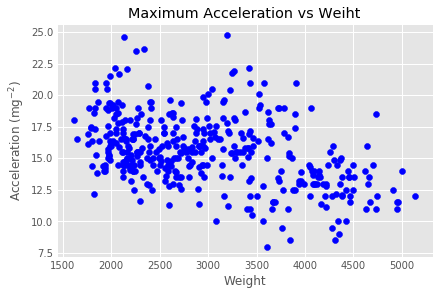

In [59]:
plt.scatter(weight, accele, 
            marker='o', color='blue')

plt.xlabel('Weight')
plt.ylabel('Acceleration (ms$^{-2}$)')
plt.title('Maximum Acceleration vs Weiht')

plt.show()

### Histograms in 1D

In [2]:
counts, bins, patches = plt.hist(accele, bins=25, 
                                 color='red', edgecolor='black', linewidth=1.2)

plt.xlabel('Acceleration (ms$^{-2}$)')
plt.title('1D Acceleration Histogram')

plt.show()

NameError: name 'plt' is not defined

### Histograms in 2D

Histogram bins can be in more general shapes, such as rectangular or hexagonal.

#### Rectangular binning

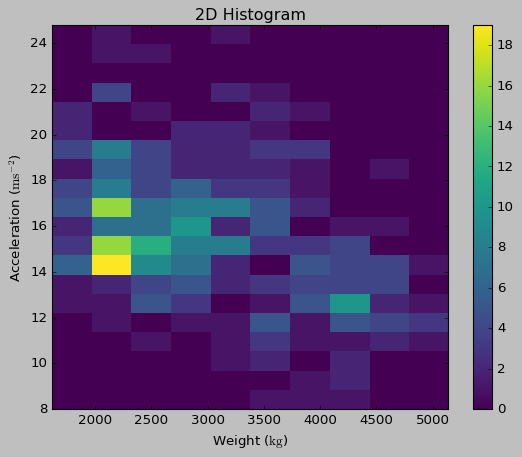

In [70]:
plt.hist2d(weight, accele, bins=(10, 20), cmap='viridis')

plt.colorbar()

plt.title('2D Histogram')
plt.xlabel('Weight ($\mathrm{kg}$)')
plt.ylabel('Acceleration ($\mathrm{ms}^{-2}$)')
plt.grid(False)

plt.show()

# we can see rectangular pins

#### Hexagonal binning

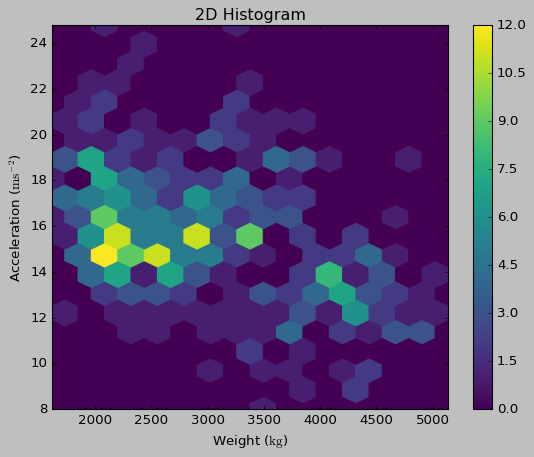

In [75]:
plt.hexbin(weight, accele, gridsize=(15, 10), cmap='viridis') # gridsize is the number of hexagons draw 
                                                              # in the horizontal direction

plt.colorbar()

plt.title('2D Histogram')
plt.xlabel('Weight ($\mathrm{kg}$)')
plt.ylabel('Acceleration ($\mathrm{ms}^{-2}$)')

plt.show()

# the scaling of x and y axis are different, thus hexagons are not regularly shaped

## Working with images

Image is a matrix of intensity values. Color images are typically 3 2D arrays (channels). Channel values are 0 to 1 (floating-point numbers) or 0 to 255 (8 bit integers).

In [5]:
# Loading images:
im_path = 'images/'

img = plt.imread(im_path + 'apple.png') # image is read into 3D numpy array

img.shape

(314, 305, 4)

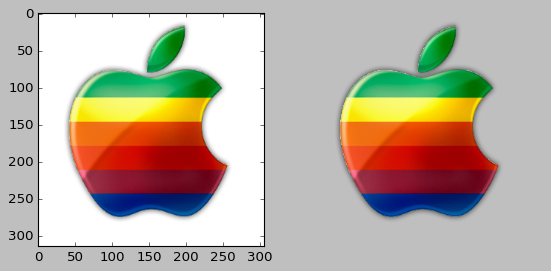

In [91]:
plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(img)
plt.axis('off') # gets rid of the axes

plt.show()

#### Reduction to grayscale image

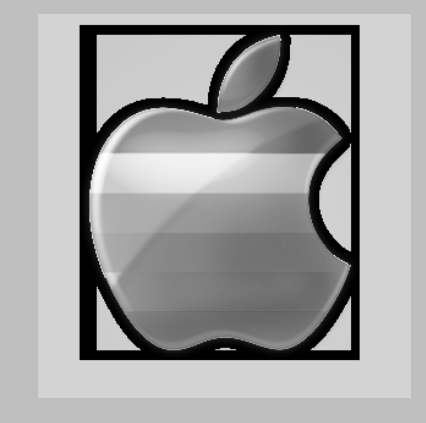

In [93]:
collapsed = img.mean(axis=2)

plt.set_cmap('gray')

plt.imshow(collapsed, cmap='gray')

plt.axis('off')

plt.show()

## Visulizing regressions

## Seaborn libary - statistical visualization

Seaborn is a visalization libary which is built on top of matplotlib and co-operates best with pandas.

### Linear regression plots

In [94]:
df.head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>mpg</th>
      <th>cylinders</th>
      <th>displacement</th>
      <th>horsepower</th>
      <th>weight</th>
      <th>acceleration</th>
      <th>model-year</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>18.0</td>
      <td>8</td>
      <td>307.0</td>
      <td>130.0</td>
      <td>3504</td>
      <td>12.0</td>
      <td>70</td>
    </tr>
    <tr>
      <th>1</th>
      <td>15.0</td>
      <td>8</td>
      <td>350.0</td>
      <td>165.0</td>
      <td>3693</td>
      <td>11.5</td>
      <td>70</td>
    </tr>
    <tr>
      <th>2</th>
      <td>18.0</td>
      <td>8</td>
      <td>318.0</td>
      <td>150.0</td>
      <td>3436</td>
      <td>11.0</td>
      <td>70</td>
    </tr>
    <tr>
      <th>3</th>
      <td>16.0</td>
      <td>8</td>
      <td>304.0</td>
      <td>150.0</td>
      <td>3433</td>
      <td>12.0</td>
      <td>70</td>
    </tr>
    <tr>
      <th>4</th>
      <td>17.0</td>
      <td>8</td>
      <td>302.0</td>
      <td>140.0</td>
      <td>3449</td>
      <td>10.5</td>
      <td>70</td>
    </tr>
  </tbody>
</table>
</div>

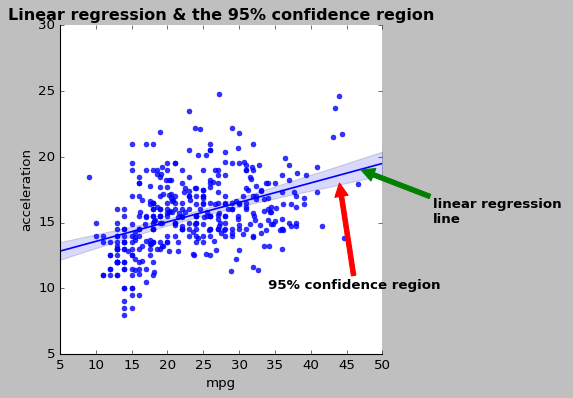

In [115]:
import seaborn as sns

sns.lmplot(x='mpg', y='acceleration', data=df)

plt.annotate('95% confidence region', xy=(44, 18), weight='bold', color='black',
             xytext=(34, 10), arrowprops={'color': 'red'})

plt.annotate('linear regression \nline', xy=(47, 19), xytext=(57, 15),
             arrowprops={'color': 'green'}, weight='bold', color='black')

plt.title('Linear regression & the 95% confidence region', fontdict={'fontweight': 'bold'})

plt.show()

Factors - categorical data, like sex

In [116]:
titanic = pd.read_csv(path + 'titanic.csv', sep='\t')
titanic.head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>PassengerId</th>
      <th>Survived</th>
      <th>Pclass</th>
      <th>Name</th>
      <th>Sex</th>
      <th>Age</th>
      <th>SibSp</th>
      <th>Parch</th>
      <th>Ticket</th>
      <th>Fare</th>
      <th>Cabin</th>
      <th>Embarked</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>0</td>
      <td>3</td>
      <td>Braund, Mr. Owen Harris</td>
      <td>male</td>
      <td>22.0</td>
      <td>1</td>
      <td>0</td>
      <td>A/5 21171</td>
      <td>7.2500</td>
      <td>NaN</td>
      <td>S</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2</td>
      <td>1</td>
      <td>1</td>
      <td>Cumings, Mrs. John Bradley (Florence Briggs Th...</td>
      <td>female</td>
      <td>38.0</td>
      <td>1</td>
      <td>0</td>
      <td>PC 17599</td>
      <td>71.2833</td>
      <td>C85</td>
      <td>C</td>
    </tr>
    <tr>
      <th>2</th>
      <td>3</td>
      <td>1</td>
      <td>3</td>
      <td>Heikkinen, Miss. Laina</td>
      <td>female</td>
      <td>26.0</td>
      <td>0</td>
      <td>0</td>
      <td>STON/O2. 3101282</td>
      <td>7.9250</td>
      <td>NaN</td>
      <td>S</td>
    </tr>
    <tr>
      <th>3</th>
      <td>4</td>
      <td>1</td>
      <td>1</td>
      <td>Futrelle, Mrs. Jacques Heath (Lily May Peel)</td>
      <td>female</td>
      <td>35.0</td>
      <td>1</td>
      <td>0</td>
      <td>113803</td>
      <td>53.1000</td>
      <td>C123</td>
      <td>S</td>
    </tr>
    <tr>
      <th>4</th>
      <td>5</td>
      <td>0</td>
      <td>3</td>
      <td>Allen, Mr. William Henry</td>
      <td>male</td>
      <td>35.0</td>
      <td>0</td>
      <td>0</td>
      <td>373450</td>
      <td>8.0500</td>
      <td>NaN</td>
      <td>S</td>
    </tr>
  </tbody>
</table>
</div>

#### Grouping factors (same plot)

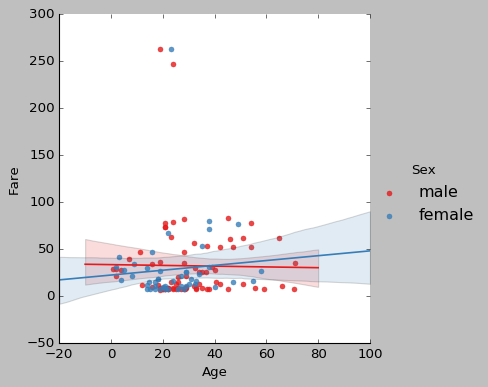

In [117]:
sns.lmplot(x='Age', y='Fare', data=titanic, hue='Sex', palette='Set1')
                        # the hue parameter specifies the factor
                        
plt.show()

We could use seprate axes for plotting factors

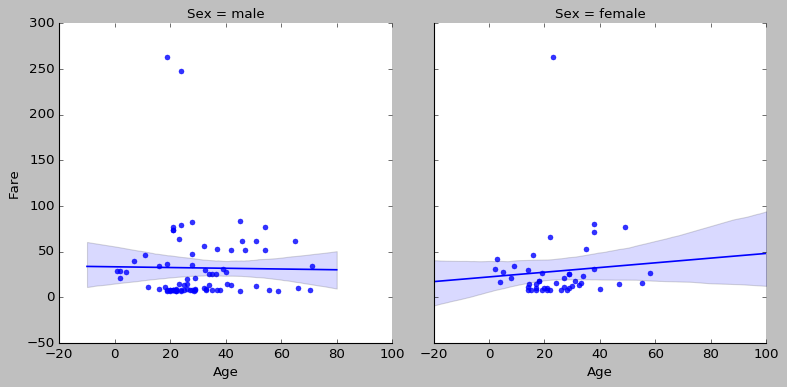

In [118]:
sns.lmplot(x='Age', y='Fare', data=titanic, col='Sex')

plt.show()

### Residual plots .residplot()

Resiudal plots: how much the data misses the regression line

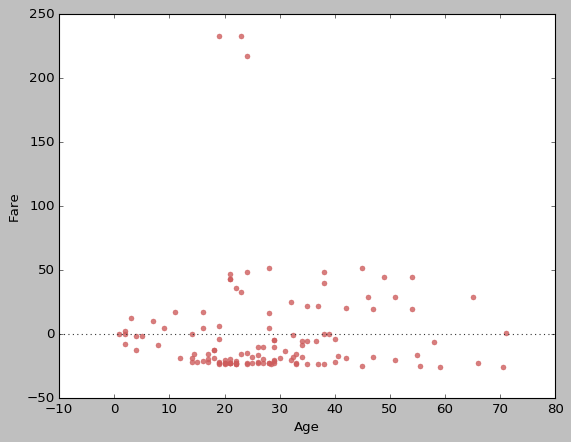

In [119]:
sns.residplot(x='Age', y='Fare', data=titanic, color='indianred')

plt.show()

#### Higher-order regressions

For both sns.lmplot() and sns.regplot(), the keyword order is used to control the order of polynomial regression. The function sns.regplot() uses the argument scatter=None to prevent plotting the scatter plot points again.

In [121]:
df.head(2)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>mpg</th>
      <th>cylinders</th>
      <th>displacement</th>
      <th>horsepower</th>
      <th>weight</th>
      <th>acceleration</th>
      <th>model-year</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>18.0</td>
      <td>8</td>
      <td>307.0</td>
      <td>130.0</td>
      <td>3504</td>
      <td>12.0</td>
      <td>70</td>
    </tr>
    <tr>
      <th>1</th>
      <td>15.0</td>
      <td>8</td>
      <td>350.0</td>
      <td>165.0</td>
      <td>3693</td>
      <td>11.5</td>
      <td>70</td>
    </tr>
  </tbody>
</table>
</div>

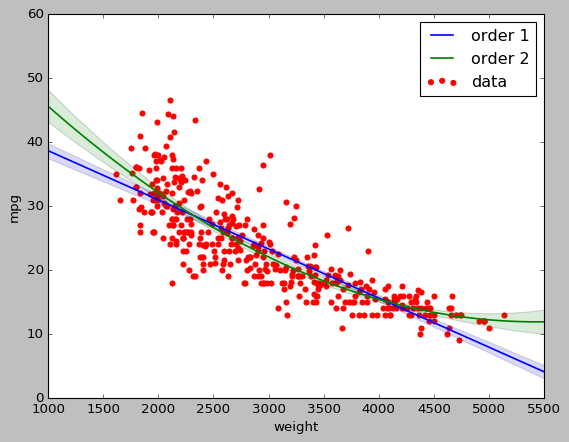

In [124]:
plt.scatter(df.weight, df.mpg, label='data', color='red', marker='o')

sns.regplot(x='weight', y='mpg', data=df, color='blue', label='order 1', scatter=None)

sns.regplot(x='weight', y='mpg', data=df, order=2, label='order 2', color='green', scatter=None)

plt.legend(loc='upper right')

plt.show()

## Visulizing univariate distributions

### Strip plots

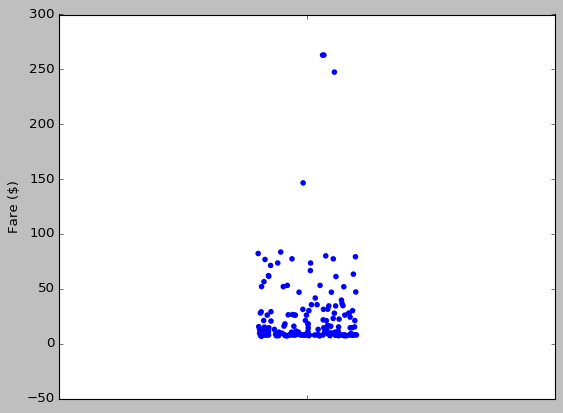

In [126]:
sns.stripplot(y='Fare', data=titanic) # one variable data

plt.ylabel('Fare ($)')

plt.show()

#### Grouping with striplot()

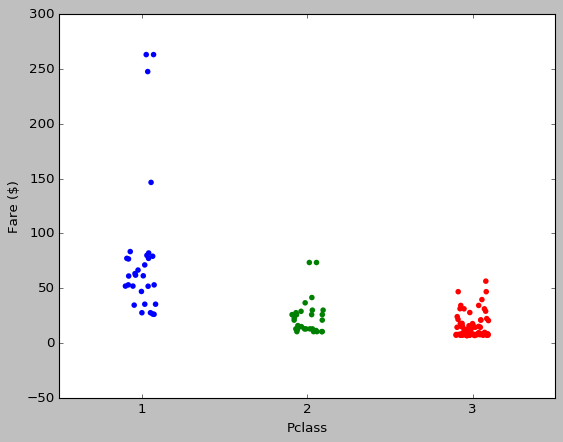

In [130]:
sns.stripplot(x='Pclass', y='Fare', data=titanic)

plt.ylabel('Fare ($)')

plt.show()

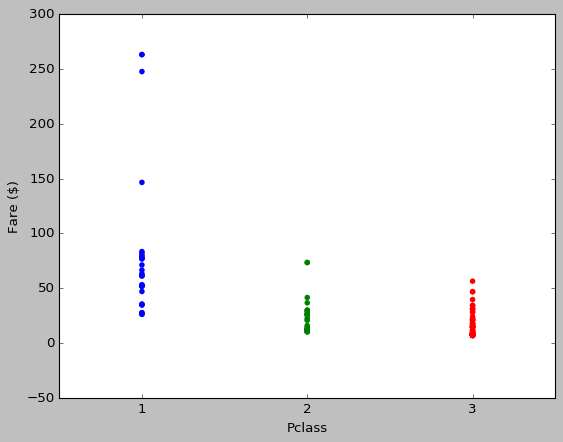

In [131]:
sns.stripplot(x='Pclass', y='Fare', data=titanic, jitter=False)

plt.ylabel('Fare ($)')

plt.show()

### Swarm plot

Swarm plots rearrange data on the scale so that the points do not overlap and thus gives us the sense of the distribution

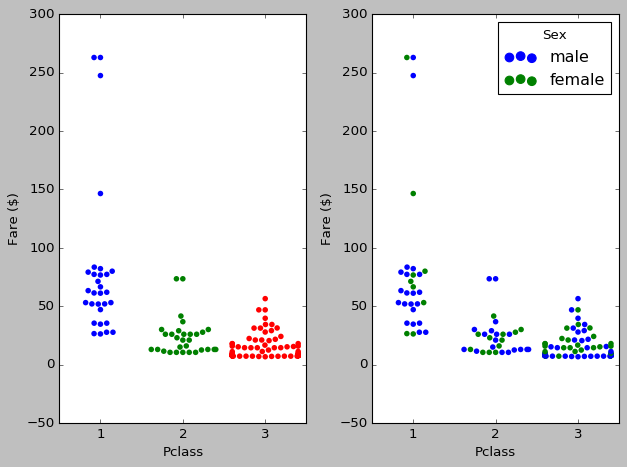

In [136]:
plt.subplot(1, 2, 1)

sns.swarmplot(x='Pclass', y='Fare', data=titanic)

plt.ylabel('Fare ($)')

plt.subplot(1, 2, 2)

sns.swarmplot(x='Pclass', y='Fare', data=titanic, hue='Sex') # group with another categorical data

plt.ylabel('Fare ($)')

plt.tight_layout()

plt.show()

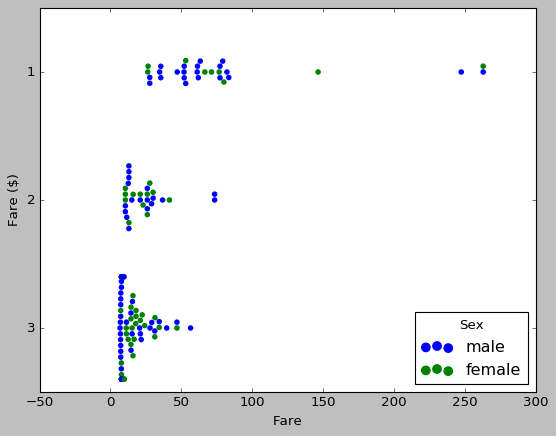

In [138]:
# orientation can be changed easily
sns.swarmplot(y='Pclass',x ='Fare', data=titanic, orient='h', hue='Sex')

plt.ylabel('Fare ($)')

plt.show()

### Violin and box plots

Usually used if we have a lot of data

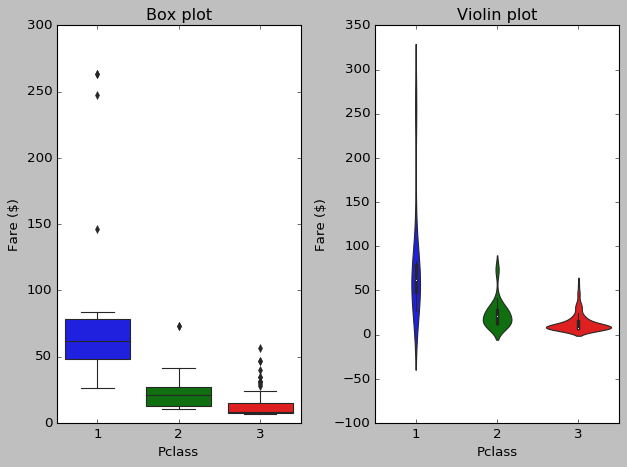

In [141]:
plt.subplot(1, 2, 1)

sns.boxplot(x='Pclass', y='Fare', data=titanic)

plt.ylabel('Fare ($)')
plt.title('Box plot')

plt.subplot(1, 2, 2)

sns.violinplot(x='Pclass', y='Fare', data=titanic)

plt.ylabel('Fare ($)')
plt.title('Violin plot')

plt.tight_layout()

plt.show()

#### Combining plots

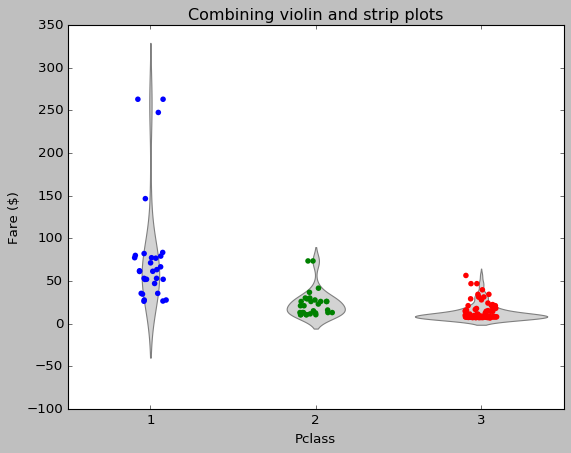

In [144]:
sns.violinplot(x='Pclass', y='Fare', data=titanic, inner=None,
               color='lightgray')

sns.stripplot(x='Pclass', y='Fare', data=titanic)

plt.ylabel('Fare ($)')
plt.title('Combining violin and strip plots')
plt.show()

## Visualizing multivariate distributions

### Joint plot

In [146]:
tips = pd.read_csv(path + 'tips.csv')
tips.head(2)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>total_bill</th>
      <th>tip</th>
      <th>sex</th>
      <th>smoker</th>
      <th>day</th>
      <th>time</th>
      <th>size</th>
      <th>fraction</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>16.99</td>
      <td>1.01</td>
      <td>Female</td>
      <td>No</td>
      <td>Sun</td>
      <td>Dinner</td>
      <td>2</td>
      <td>0.059447</td>
    </tr>
    <tr>
      <th>1</th>
      <td>10.34</td>
      <td>1.66</td>
      <td>Male</td>
      <td>No</td>
      <td>Sun</td>
      <td>Dinner</td>
      <td>3</td>
      <td>0.160542</td>
    </tr>
  </tbody>
</table>
</div>

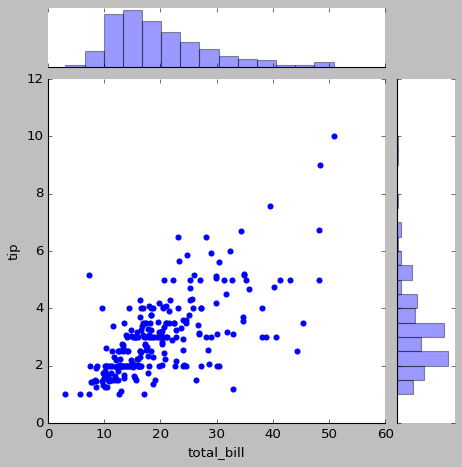

In [148]:
sns.jointplot(x='total_bill', y='tip', data=tips)

plt.show()

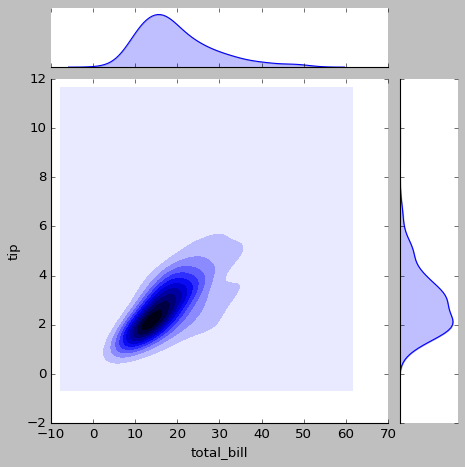

In [152]:
# KDE
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde')

plt.show()

### Pair plot

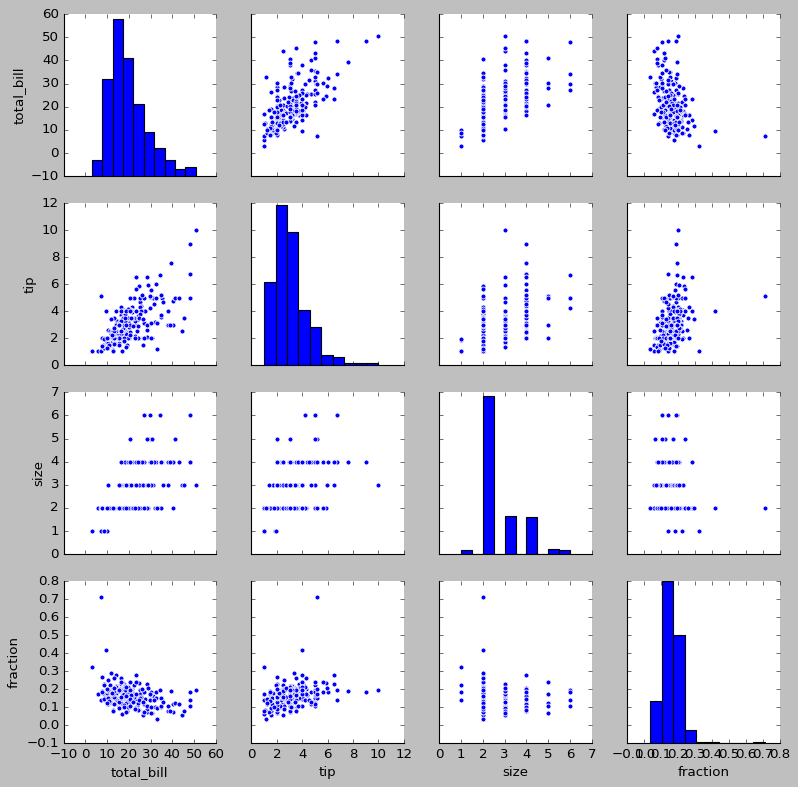

In [153]:
# command only uses numerical columns of a dataframe
sns.pairplot(tips)

plt.show()

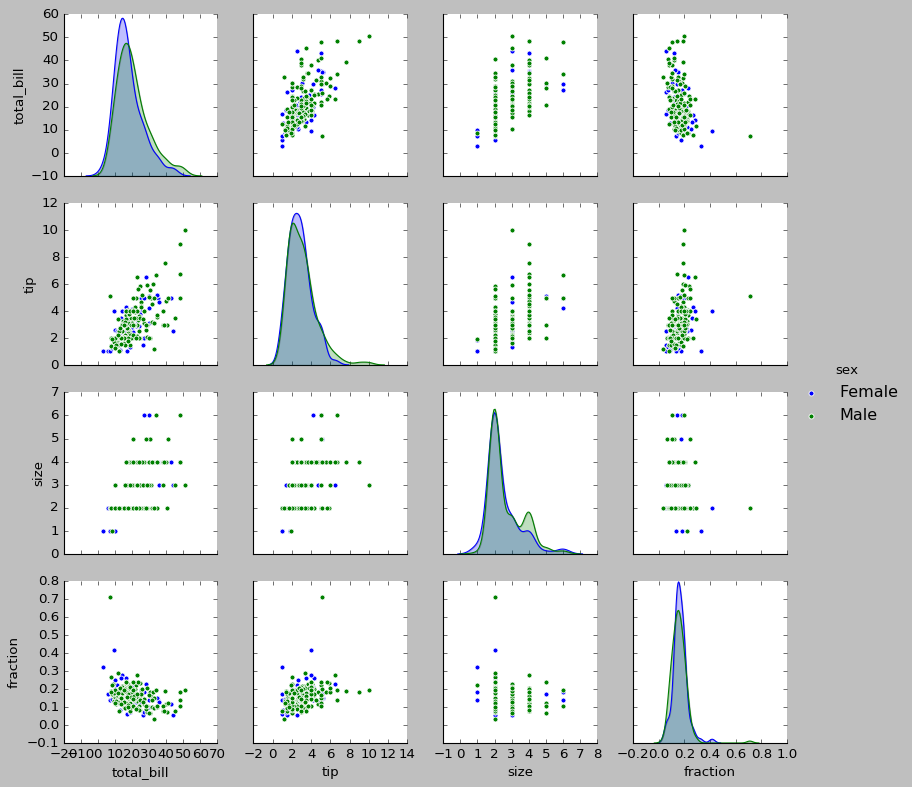

In [154]:
sns.pairplot(tips, hue='sex')

plt.show()

### Heat map

In [165]:
# covariance matrix shows how strongly 2 variables change together
correlation = tips.corr()
correlation

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>total_bill</th>
      <th>tip</th>
      <th>size</th>
      <th>fraction</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>total_bill</th>
      <td>1.000000</td>
      <td>0.675734</td>
      <td>0.598315</td>
      <td>-0.338624</td>
    </tr>
    <tr>
      <th>tip</th>
      <td>0.675734</td>
      <td>1.000000</td>
      <td>0.489299</td>
      <td>0.342370</td>
    </tr>
    <tr>
      <th>size</th>
      <td>0.598315</td>
      <td>0.489299</td>
      <td>1.000000</td>
      <td>-0.142860</td>
    </tr>
    <tr>
      <th>fraction</th>
      <td>-0.338624</td>
      <td>0.342370</td>
      <td>-0.142860</td>
      <td>1.000000</td>
    </tr>
  </tbody>
</table>
</div>

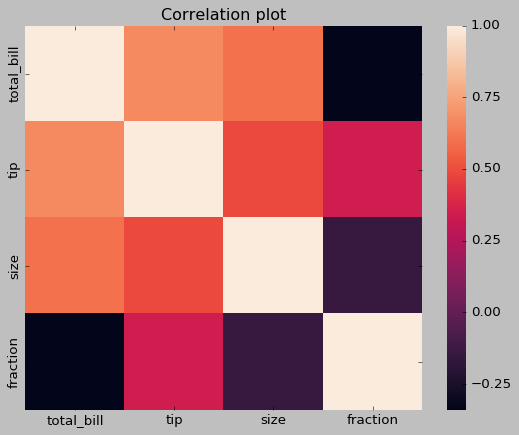

In [167]:
sns.heatmap(correlation)

plt.title('Correlation plot')

plt.show()

In [168]:
covariance = tips.cov()
covariance

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>total_bill</th>
      <th>tip</th>
      <th>size</th>
      <th>fraction</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>total_bill</th>
      <td>79.252939</td>
      <td>8.323502</td>
      <td>5.065983</td>
      <td>-0.184107</td>
    </tr>
    <tr>
      <th>tip</th>
      <td>8.323502</td>
      <td>1.914455</td>
      <td>0.643906</td>
      <td>0.028931</td>
    </tr>
    <tr>
      <th>size</th>
      <td>5.065983</td>
      <td>0.643906</td>
      <td>0.904591</td>
      <td>-0.008298</td>
    </tr>
    <tr>
      <th>fraction</th>
      <td>-0.184107</td>
      <td>0.028931</td>
      <td>-0.008298</td>
      <td>0.003730</td>
    </tr>
  </tbody>
</table>
</div>

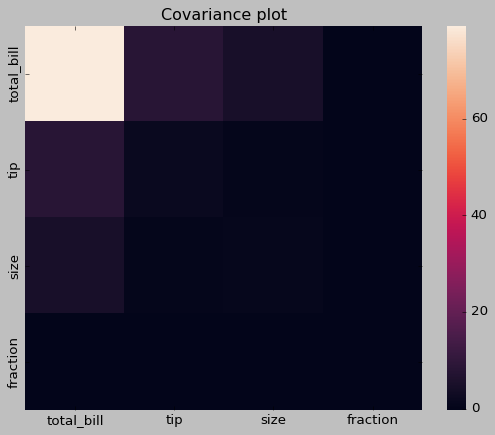

In [169]:
sns.heatmap(covariance)

plt.title('Covariance plot')

plt.show()

## Visualizing time series

### Datetimes & time series

In [180]:
weather = pd.read_csv(path + 'pittsburgh2013.csv', 
                      usecols=['Date', 'Mean TemperatureF', 'Mean Dew PointF', 'Mean Sea Level PressureIn'],
                      index_col='Date', parse_dates=True)
weather.head(2)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Mean TemperatureF</th>
      <th>Mean Dew PointF</th>
      <th>Mean Sea Level PressureIn</th>
    </tr>
    <tr>
      <th>Date</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2013-01-01</th>
      <td>28</td>
      <td>27</td>
      <td>30.01</td>
    </tr>
    <tr>
      <th>2013-01-02</th>
      <td>21</td>
      <td>12</td>
      <td>30.18</td>
    </tr>
  </tbody>
</table>
</div>

In [181]:
weather.columns = ['temperature', 'dewpoint', 'pressure']
weather.head(2)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>temperature</th>
      <th>dewpoint</th>
      <th>pressure</th>
    </tr>
    <tr>
      <th>Date</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2013-01-01</th>
      <td>28</td>
      <td>27</td>
      <td>30.01</td>
    </tr>
    <tr>
      <th>2013-01-02</th>
      <td>21</td>
      <td>12</td>
      <td>30.18</td>
    </tr>
  </tbody>
</table>
</div>

In [182]:
type(weather.index)

pandas.core.indexes.datetimes.DatetimeIndex

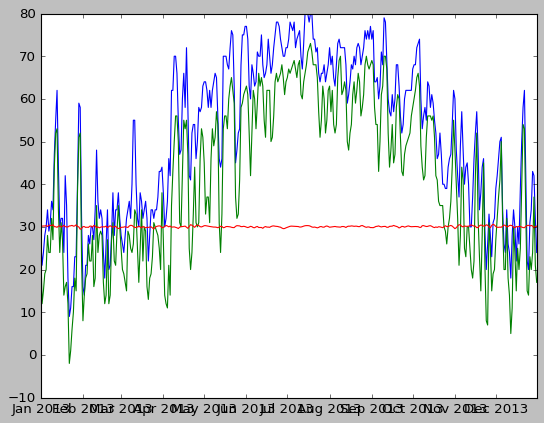

In [183]:
# plotting all the columns of the weather DF
plt.plot(weather)

plt.show()

In [185]:
temperature = weather['temperature']

march_aprl = temperature['2013-03': '2013-04'] # data of March & April of 2013 only

march_aprl.shape

(61,)

In [186]:
march_aprl.iloc[-4:] # last 4 entries

Date
2013-04-27    58
2013-04-28    57
2013-04-29    58
2013-04-30    63
Name: temperature, dtype: int64

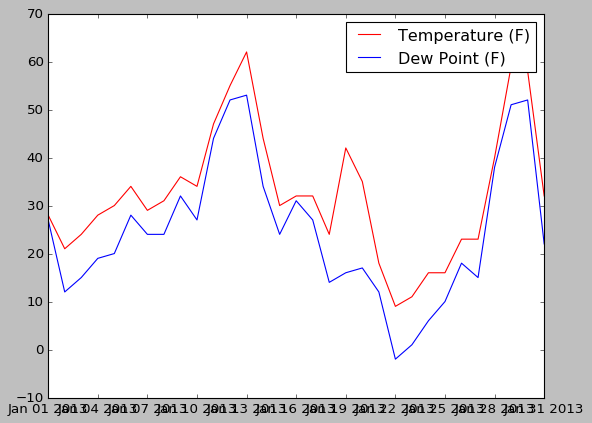

In [188]:
plt.plot(temperature['2013-01'], color='red', label='Temperature (F)')

dew_point = weather.dewpoint

plt.plot(dew_point['2013-01'], color='blue', label='Dew Point (F)')

plt.legend(loc='upper right')

plt.show()

#### Selecting and formatting dates

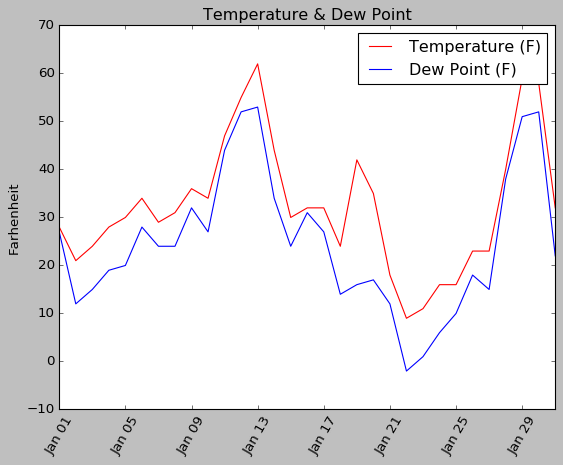

In [192]:
jan = temperature['2013-01']
dates = jan.index[::4]  # pick every 4th day
labels = dates.strftime('%b %d')  # make formatted labels

plt.plot(jan, color='red', label='Temperature (F)')

dew_point = weather.dewpoint

plt.plot(dew_point['2013-01'], color='blue', label='Dew Point (F)')

plt.legend(loc='upper right')
plt.title('Temperature & Dew Point')
plt.xticks(dates, labels, rotation=60)
plt.ylabel('Farhenheit')

plt.show()

### Time series with moving windows

In [ ]:
# viewing one week averages
plt.plot()